# EDA

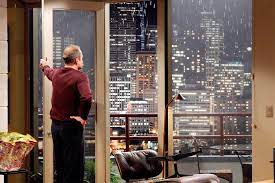

In [29]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [30]:
import psycopg2
import os 
from dotenv import load_dotenv

load_dotenv

DATABASE = os.getenv('DATABASE')
USER_DB = os.getenv('USER_DB')
PASSWORD = os.getenv('PASSWORD')
HOST = os.getenv('HOST')
PORT = os.getenv('PORT')


In [31]:
conn = psycopg2.connect(
    database=DATABASE,
    user=USER_DB,
    password=PASSWORD,
    host=HOST,
    port=PORT
)

In [32]:
cur = conn.cursor()

In [33]:
query_string = """
SELECT
  kchd.*,
  kchs."date",
  kchs.price
FROM eda.king_county_house_details AS kchd
LEFT JOIN eda.king_county_house_sales  AS kchs
  ON kchd.id = kchs.house_id;
"""
df_psycopg = pd.read_sql(query_string, conn)

In [34]:
conn.close()

In [35]:
df_psycopg.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000


In [36]:
df_psycopg.to_csv('data/eda.csv', index=False)

In [37]:
df_kingc = pd.read_csv('data/eda.csv')

In [38]:
df_kingc.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000


In [39]:
df_kingc.columns = df_kingc.columns.str.replace(' ','_')
df_kingc.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price'],
      dtype='object')

In [40]:
df_kingc.columns = df_kingc.columns.str.lower()
df_kingc.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price'],
      dtype='object')

In [41]:
df_kingc.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000


In [42]:
# remove duplicates
df_kingc = df_kingc.drop_duplicates()
# reset index inplace
df_kingc.reset_index(inplace=True, drop=True)
df_kingc.head(5)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000


In [43]:
df_kingc.dtypes

id                 int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
date              object
price            float64
dtype: object

In [44]:
type(df_kingc['date'][0])

str

In [45]:
# change "date" dtype to datetime with format %Y/%m/%d
df_kingc['date'] = pd.to_datetime(df_kingc['date'], format='%Y-%m-%d')

In [46]:
type(df_kingc['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [47]:
df_kingc['bedrooms'] = df_kingc['bedrooms'].astype(int)
df_kingc['bathrooms'] = df_kingc['bathrooms'].astype(int)
df_kingc['floors'] = df_kingc['floors'].astype(int)
df_kingc['price'] = df_kingc['price'].astype(int)
df_kingc['sqft_lot15'] = df_kingc['sqft_lot15'].astype(int)
df_kingc['sqft_living15'] = df_kingc['sqft_living15'].astype(int)
df_kingc['sqft_living'] = df_kingc['sqft_living'].astype(int)
df_kingc['sqft_lot'] = df_kingc['sqft_lot'].astype(int)
df_kingc['sqf'] = df_kingc['sqft_lot'].astype(int)
df_kingc.head(10)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,sqf
0,7129300520,3,1,1180,5650,1,NaN,0.000,3,7,...,1955,0.000,98178,47.511,-122.257,1340,5650,2014-10-13,221900,5650
1,6414100192,3,2,2570,7242,2,0.000,0.000,3,7,...,1951,19910.000,98125,47.721,-122.319,1690,7639,2014-12-09,538000,7242
2,5631500400,2,1,770,10000,1,0.000,0.000,3,6,...,1933,NaN,98028,47.738,-122.233,2720,8062,2015-02-25,180000,10000
3,2487200875,4,3,1960,5000,1,0.000,0.000,5,7,...,1965,0.000,98136,47.521,-122.393,1360,5000,2014-12-09,604000,5000
4,1954400510,3,2,1680,8080,1,0.000,0.000,3,8,...,1987,0.000,98074,47.617,-122.045,1800,7503,2015-02-18,510000,8080
5,7237550310,4,4,5420,101930,1,0.000,0.000,3,11,...,2001,0.000,98053,47.656,-122.005,4760,101930,2014-05-12,1230000,101930
6,1321400060,3,2,1715,6819,2,0.000,0.000,3,7,...,1995,0.000,98003,47.310,-122.327,2238,6819,2014-06-27,257500,6819
7,2008000270,3,1,1060,9711,1,0.000,NaN,3,7,...,1963,0.000,98198,47.410,-122.315,1650,9711,2015-01-15,291850,9711
8,2414600126,3,1,1780,7470,1,0.000,0.000,3,7,...,1960,0.000,98146,47.512,-122.337,1780,8113,2015-04-15,229500,7470
9,3793500160,3,2,1890,6560,2,0.000,0.000,3,7,...,2003,0.000,98038,47.368,-122.031,2390,7570,2015-03-12,323000,6560


In [48]:
df_new_kingc = df_kingc.fillna(0)

df_new_kingc['waterfront'] = df_new_kingc['waterfront'].astype(int)
df_new_kingc['view'] = df_new_kingc['view'].astype(int)
df_new_kingc['sqft_basement'] = df_new_kingc['sqft_basement'].astype(int)
df_new_kingc['yr_renovated'] = df_new_kingc['yr_renovated'].astype(int)

s = pd.to_numeric(df_new_kingc['yr_renovated'], errors='coerce')           # to numeric, NaN on bad
mask = (s >= 10000) & (s % 10 == 0)                              # 5-digit and ends with 0
s.loc[mask] = s.loc[mask] // 10                                  # remove the trailing zero
df_new_kingc['yr_renovated'] = s.astype('Int64')   

df_new_kingc.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,sqf
0,7129300520,3,1,1180,5650,1,0,0,3,7,...,1955,0,98178,47.511,-122.257,1340,5650,2014-10-13,221900,5650
1,6414100192,3,2,2570,7242,2,0,0,3,7,...,1951,1991,98125,47.721,-122.319,1690,7639,2014-12-09,538000,7242
2,5631500400,2,1,770,10000,1,0,0,3,6,...,1933,0,98028,47.738,-122.233,2720,8062,2015-02-25,180000,10000
3,2487200875,4,3,1960,5000,1,0,0,5,7,...,1965,0,98136,47.521,-122.393,1360,5000,2014-12-09,604000,5000
4,1954400510,3,2,1680,8080,1,0,0,3,8,...,1987,0,98074,47.617,-122.045,1800,7503,2015-02-18,510000,8080


In [49]:
df_new_kingc.columns = df_new_kingc.columns.str.replace(r'^yr_', '', regex=True)

df_new_kingc = df_new_kingc.rename(columns={
    'bedrooms': 'bedr.',
    'bathrooms': 'bathr.'
})

df_new_kingc.head()

,id,bedr.,bathr.,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,sqf
0,7129300520,3,1,1180,5650,1,0,0,3,7,...,1955,0,98178,47.511,-122.257,1340,5650,2014-10-13,221900,5650
1,6414100192,3,2,2570,7242,2,0,0,3,7,...,1951,1991,98125,47.721,-122.319,1690,7639,2014-12-09,538000,7242
2,5631500400,2,1,770,10000,1,0,0,3,6,...,1933,0,98028,47.738,-122.233,2720,8062,2015-02-25,180000,10000
3,2487200875,4,3,1960,5000,1,0,0,5,7,...,1965,0,98136,47.521,-122.393,1360,5000,2014-12-09,604000,5000
4,1954400510,3,2,1680,8080,1,0,0,3,8,...,1987,0,98074,47.617,-122.045,1800,7503,2015-02-18,510000,8080


In [50]:
df_new_kingc = df_new_kingc.rename(columns={
    'bedr.': 'bedrooms',
    'bathr.': 'bathrooms'
})

df_new_kingc.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,sqf
0,7129300520,3,1,1180,5650,1,0,0,3,7,...,1955,0,98178,47.511,-122.257,1340,5650,2014-10-13,221900,5650
1,6414100192,3,2,2570,7242,2,0,0,3,7,...,1951,1991,98125,47.721,-122.319,1690,7639,2014-12-09,538000,7242
2,5631500400,2,1,770,10000,1,0,0,3,6,...,1933,0,98028,47.738,-122.233,2720,8062,2015-02-25,180000,10000
3,2487200875,4,3,1960,5000,1,0,0,5,7,...,1965,0,98136,47.521,-122.393,1360,5000,2014-12-09,604000,5000
4,1954400510,3,2,1680,8080,1,0,0,3,8,...,1987,0,98074,47.617,-122.045,1800,7503,2015-02-18,510000,8080


In [89]:
df_kingc_presentation = df_new_kingc.drop(columns=["sqft_living15", "sqft_lot15"])
df_kingc_presentation['sqft_above'] = df_kingc_presentation['sqft_above'].astype(int)

df_kingc_presentation.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,built,renovated,zipcode,lat,long,date,price,sqf
0,7129300520,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,2014-10-13,221900,5650
1,6414100192,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,2014-12-09,538000,7242
2,5631500400,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2015-02-25,180000,10000
3,2487200875,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,2014-12-09,604000,5000
4,1954400510,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,2015-02-18,510000,8080


In [90]:
df_kingc_presentation.to_csv('data/eda_presentation_samir.csv', index=False)

In [85]:
df_kingc_presentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   bedrooms       21597 non-null  int64         
 2   bathrooms      21597 non-null  int64         
 3   sqft_living    21597 non-null  int64         
 4   sqft_lot       21597 non-null  int64         
 5   floors         21597 non-null  int64         
 6   waterfront     21597 non-null  int64         
 7   view           21597 non-null  int64         
 8   condition      21597 non-null  int64         
 9   grade          21597 non-null  int64         
 10  sqft_above     21597 non-null  float64       
 11  sqft_basement  21597 non-null  int64         
 12  built          21597 non-null  int64         
 13  renovated      21597 non-null  Int64         
 14  zipcode        21597 non-null  int64         
 15  lat            2159

In [86]:
counts_house_built = df_kingc_presentation['built'].value_counts().sort_index()

counts_house_built.info


<bound method Series.info of built
1900     87
1901     29
1902     27
1903     46
1904     45
       ... 
2011    130
2012    170
2013    201
2014    559
2015     38
Name: count, Length: 116, dtype: int64>

<class 'pandas.core.series.Series'>
Index: 70 entries, 98001 to 98199
Series name: count
Non-Null Count  Dtype
--------------  -----
70 non-null     int64
dtypes: int64(1)
memory usage: 1.1 KB


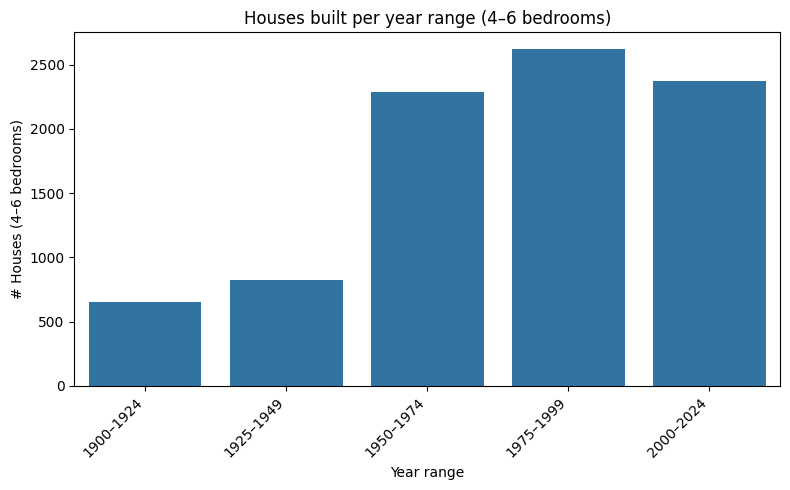

In [87]:
mask_bedrooms = df_kingc_presentation['bedrooms'].between(4, 6, inclusive='both')
df_filt = df_kingc_presentation.loc[mask_bedrooms].copy()

bins   = [1900, 1925, 1950, 1975, 2000, 2025]     # adjust as needed
labels = [f"{a}–{b-1}" for a, b in zip(bins[:-1], bins[1:])]

year_bin = pd.cut(df_filt['built'], bins=bins, right=False, include_lowest=True, labels=labels)
counts_ranges = (
    year_bin.value_counts(sort=False)
            .rename_axis('range')
            .reset_index(name='n_houses')
)

sns.barplot(data=counts_ranges, x='range', y='n_houses')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Year range')
plt.ylabel('# Houses (4–6 bedrooms)')
plt.title('Houses built per year range (4–6 bedrooms)')
plt.tight_layout()
plt.show()

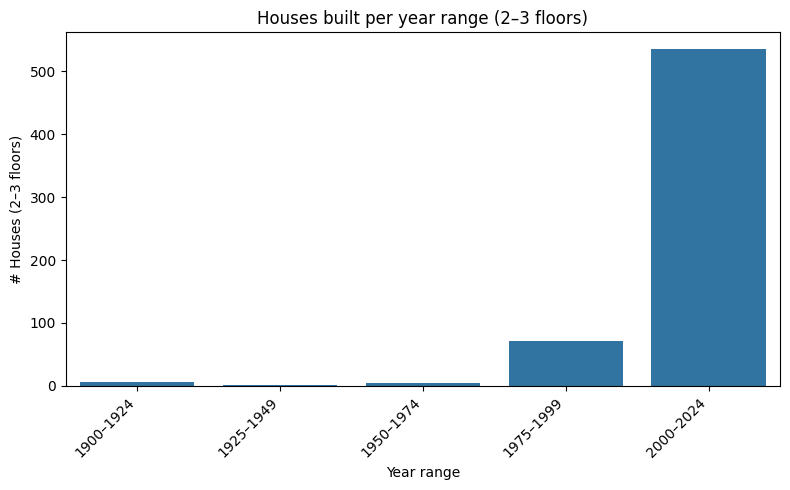

In [88]:
mask_floors = df_kingc_presentation['floors'].between(3, 4, inclusive='both')
df_filt = df_kingc_presentation.loc[mask_floors].copy()

bins   = [1900, 1925, 1950, 1975, 2000, 2025]     # adjust as needed
labels = [f"{a}–{b-1}" for a, b in zip(bins[:-1], bins[1:])]

year_bin = pd.cut(df_filt['built'], bins=bins, right=False, include_lowest=True, labels=labels)
counts_ranges = (
    year_bin.value_counts(sort=False)
            .rename_axis('range')
            .reset_index(name='n_houses')
)

sns.barplot(data=counts_ranges, x='range', y='n_houses')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Year range')
plt.ylabel('# Houses (2–3 floors)')
plt.title('Houses built per year range (2–3 floors)')
plt.tight_layout()
plt.show()

bedrooms
1      196
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64


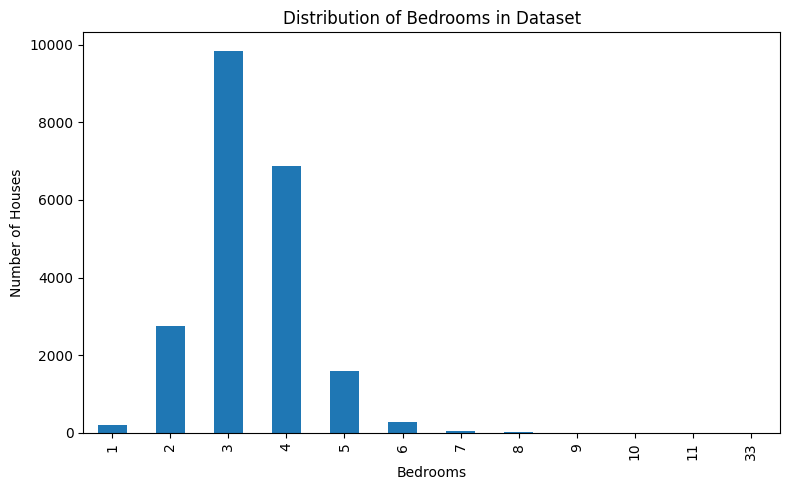

In [92]:
bedrooms_col = next((c for c in df_kingc_presentation.columns if "bedroom" in c.lower()), "bedrooms")
bedrooms = pd.to_numeric(df_kingc_presentation[bedrooms_col], errors="coerce")

counts = bedrooms.value_counts(dropna=False).sort_index()
print(counts)  # optional: see the table

plt.figure(figsize=(8,5))
counts.dropna().plot(kind="bar")   # omit NaN from the plot (kept in the table)
plt.xlabel("Bedrooms")
plt.ylabel("Number of Houses")
plt.title("Distribution of Bedrooms in Dataset")
plt.tight_layout()
plt.show()


price
$0–49,999                   0
$50,000–99,999             30
$100,000–1,000,000      20109
$1,000,001–2,000,000     1260
Name: count, dtype: int64


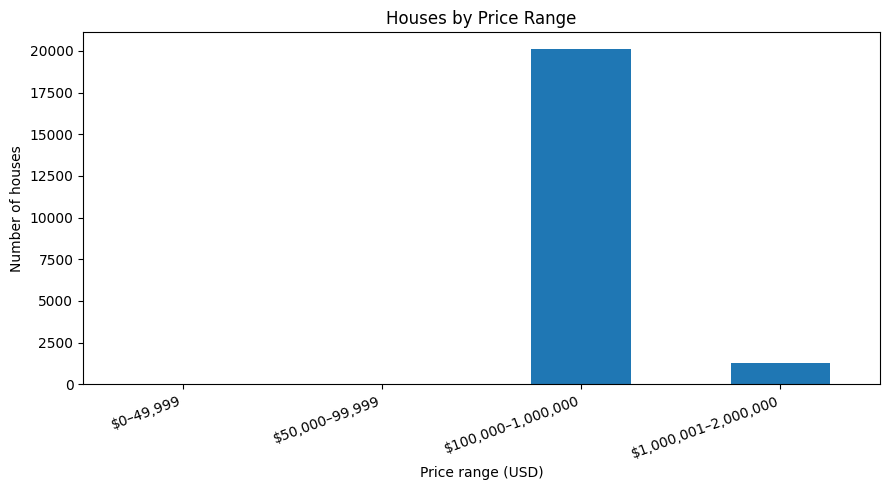

In [93]:
price_col = next((c for c in df_kingc_presentation.columns if "price" in c.lower()),
                 "price")  # fallback if it's exactly 'price'
prices = pd.to_numeric(df_kingc_presentation[price_col], errors="coerce")
prices = prices[prices >= 0]

bins = [0, 50_000, 100_000, 1_000_000, 2_000_000]
labels = ["$0–49,999", "$50,000–99,999", "$100,000–1,000,000", "$1,000,001–2,000,000"]

binned = pd.cut(prices, bins=bins, labels=labels, include_lowest=True, right=True)
counts = binned.value_counts().reindex(labels)

print(counts)  # table of counts

plt.figure(figsize=(9,5))
counts.plot(kind="bar")
plt.xlabel("Price range (USD)")
plt.ylabel("Number of houses")
plt.title("Houses by Price Range")
plt.xticks(rotation=20, ha="right")
plt.tight_layout()
plt.show()

Trendline slope: -9683.84 USD/km


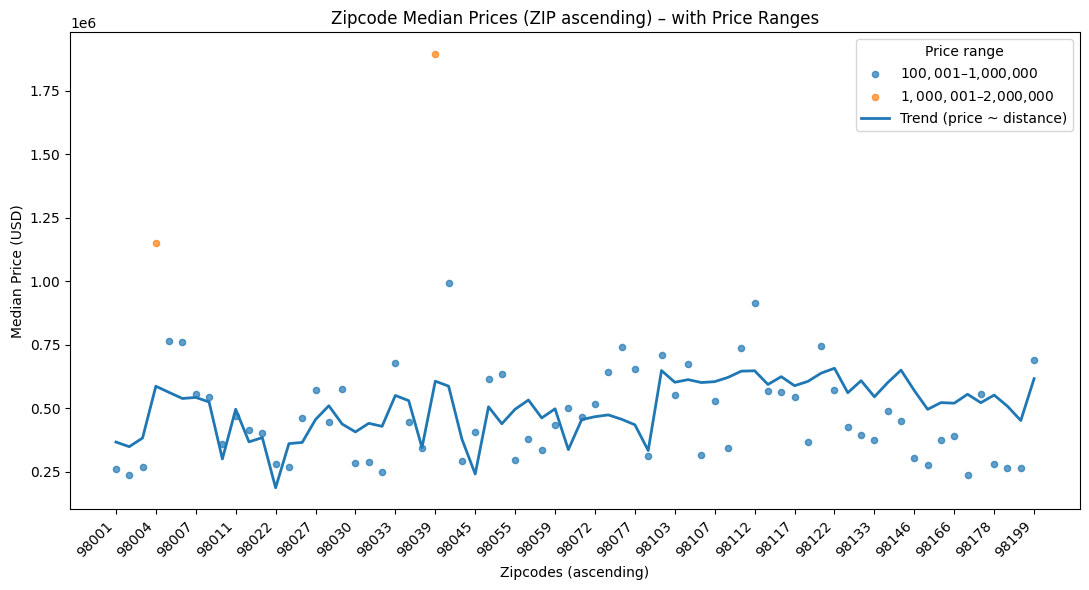

   zipcode  median_distance_km  median_price_usd            price_range  \
0    98001              32.594        260000.000    $100,001–$1,000,000   
1    98002              34.475        235000.000    $100,001–$1,000,000   
2    98003              30.968        267475.000    $100,001–$1,000,000   
3    98004               9.890       1150000.000  $1,000,001–$2,000,000   
4    98005              12.424        765475.000    $100,001–$1,000,000   
5    98006              14.885        760184.500    $100,001–$1,000,000   
6    98007              14.442        555000.000    $100,001–$1,000,000   
7    98008              16.305        545000.000    $100,001–$1,000,000   
8    98010              39.481        359999.500    $100,001–$1,000,000   
9    98011              19.263        470000.000    $100,001–$1,000,000   
10   98014              32.519        415000.000    $100,001–$1,000,000   
11   98019              30.793        401250.000    $100,001–$1,000,000   
12   98022              5

In [103]:
# ---- set your actual column names if different ----
PRICE = next((c for c in df_kingc_presentation.columns if "price" in c.lower()), "price")
ZIP   = next((c for c in df_kingc_presentation.columns if c.lower() in ("zipcode","zip","postalcode","postal_code")), "zipcode")
LAT   = next((c for c in df_kingc_presentation.columns if c.lower() in ("lat","latitude")), "lat")
LON   = next((c for c in df_kingc_presentation.columns if c.lower() in ("lon","lng","long","longitude")), "long")

# Clean/convert
df_kingc_presentation["_price"] = pd.to_numeric(df_kingc_presentation[PRICE], errors="coerce")
df_kingc_presentation["_zip"]   = df_kingc_presentation[ZIP].astype(str).str.extract(r"(\d{5})", expand=False).fillna(df_kingc_presentation[ZIP].astype(str))
df_kingc_presentation["_lat"]   = pd.to_numeric(df_kingc_presentation[LAT], errors="coerce")
df_kingc_presentation["_lon"]   = pd.to_numeric(df_kingc_presentation[LON], errors="coerce")

# Distance to Seattle city center (km) using haversine
R = 6371.0
lat0, lon0 = np.radians([47.6062, -122.3321])
lat_r, lon_r = np.radians(df_kingc_presentation["_lat"]), np.radians(df_kingc_presentation["_lon"])
dlat = lat_r - lat0
dlon = lon_r - lon0
a = np.sin(dlat/2)**2 + np.cos(lat0)*np.cos(lat_r)*np.sin(dlon/2)**2
c = 2*np.arctan2(np.sqrt(a), np.sqrt(1-a))
df_kingc_presentation["_dist_km"] = R * c

work = df_kingc_presentation[["_zip","_price","_dist_km"]].dropna()

# --- UNIQUE zipcodes: aggregate ---
zsum = (work.groupby("_zip")
             .agg(median_price_usd=("_price","median"),
                  n_listings=("_price","size"),
                  median_distance_km=("_dist_km","median"))
             .reset_index())

# Price bins (as requested)
bins   = [50_000, 100_000, 1_000_000, 2_000_000]
labels = ["$50k–$100k", "$100,001–$1,000,000", "$1,000,001–$2,000,000"]
zsum["price_range"] = pd.cut(zsum["median_price_usd"], bins=bins,
                             labels=labels, include_lowest=True, right=True)
zsum["price_range"] = zsum["price_range"].astype(str).fillna("Out of range")

# ---- Sort by ZIP code ASC (numeric when possible; fallback to string) ----
zsum["_zip_numeric"] = pd.to_numeric(zsum["_zip"], errors="coerce")
if zsum["_zip_numeric"].notna().all():
    zsum = zsum.sort_values("_zip_numeric", ascending=True)
else:
    zsum = zsum.sort_values("_zip", ascending=True)
zsum = zsum.reset_index(drop=True)

# Index for plotting
zsum["order_idx"] = np.arange(1, len(zsum)+1)

# ---- PLOT: zipcodes ordered by ZIP ASC, median price per zip, colored by price bin ----
plt.figure(figsize=(11,6))
for label in zsum["price_range"].unique():
    sub = zsum[zsum["price_range"] == label]
    plt.scatter(sub["order_idx"], sub["median_price_usd"], label=label, s=20, alpha=0.7)

# Trendline: price ~ distance (drawn against the same x order for reference)
if len(zsum) >= 2:
    x_dist = zsum["median_distance_km"].to_numpy()
    y_price = zsum["median_price_usd"].to_numpy()
    slope, intercept = np.polyfit(x_dist, y_price, 1)
    y_pred = intercept + slope * x_dist
    plt.plot(zsum["order_idx"], y_pred, linewidth=2, label="Trend (price ~ distance)")
    print(f"Trendline slope: {slope:.2f} USD/km")

# show every nth zipcode label to avoid clutter
n = max(1, len(zsum)//20)
plt.xticks(zsum["order_idx"][::n], zsum["_zip"][::n], rotation=45, ha="right")
plt.xlabel("Zipcodes (ascending)")
plt.ylabel("Median Price (USD)")
plt.title("Zipcode Median Prices (ZIP ascending) – with Price Ranges")
plt.legend(title="Price range", loc="best")
plt.tight_layout()
plt.show()

# --- Optional: tidy dataframe you can present/export ---
out_df = zsum[["_zip","median_distance_km","median_price_usd","price_range","n_listings"]].rename(
    columns={"_zip":"zipcode"}
)
print(out_df.head(15))
